In [1]:
import numpy as np
import scipy
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fft2, ifft2
from math import sqrt, tanh
pi = np.pi
π = np.pi 

def createPlot1( xlabel=r'Time [s]', ylabel=r'Amplitude [Unit]', title=""):
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.title(title, fontsize=30)
    plt.xlabel(xlabel=xlabel, fontsize=24 ); plt.ylabel(ylabel=ylabel, fontsize=24 )
    plt.xticks(fontsize=20 ); plt.yticks(fontsize=20 )
    plt.grid(b=True, which='major', linestyle='--', linewidth=.5); plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
    plt.minorticks_on()
    return fig, ax



# 4.11 Boundary Value Problem


When data associated with a differential equation are prescribed at more than one value of the independent variable, then the problem is a boundary value problem. 
To have a boundary value problem, we must have at least a second-order differential equation

$$y^" = f(x,y,y') \quad\quad  y(0)=y_0 \quad\quad y(L)=y_L \tag{4.39}$$

There are two techniques for solving boundary value problems:
1. Shooting Method
2. Direct Method

## 4.11.1 Shooting Method

Let’s reduce the second-order differential in (4.39) to two first-order equations

$$u = y \quad\quad v = y'$$


$$ 
\begin{cases} 
    u' & = v  \\ 
    v' & = f(x, u, v) 
\end{cases} 
$$ 

The conditions are

$$ u(0)=y_0 \quad\quad u(L)=y_L $$

To solve this system (with the familiar methods for initial value problems) one needs one condition for each of the unknowns u and v rather than two for one and none for the other. Therefore, we use a “guess” for v(0) and integrate both equations to x = L. 

### Sample Problem: 1D Poisson Problem

If we consider the 1D Poisson equation:

$$ \frac{ d^2 }{ dx^2 } u = f(x) \quad\quad  y(0)=0 \quad\quad y(1)=0 $$

From some courses in math we know that the eigenvalues and eigenfunction are simply sine functions:

$$ u_n = sin( 2\pi nx ) $$

We use this as a sample problem to check the correctness of the shooting method.

In [ ]:
def rhs(u,v):
    return v, λ*u


j = 5
L = 1.
λ = -j**2*π**2/L**2 * 1.004

N = 800

x = np.linspace(0, L, N); dx = x[1] - x[0]
u = np.zeros( N )
v = np.zeros( N )
v[0] = 1.

for jj in range(N-1):
    u1, v1 = rhs( u[jj], v[jj] );               u1 = u1*dx; v1 = v1*dx
    u2, v2 = rhs( u[jj] + u1/2, v[jj] + v1/2 ); u2 = u2*dx; v2 = v2*dx
    u3, v3 = rhs( u[jj] + u2/2, v[jj] + v2/2 ); u3 = u3*dx; v3 = v3*dx
    u4, v4 = rhs( u[jj] + u3, v[jj] + v3 );     u4 = u4*dx; v4 = v4*dx
    u[jj+1] = u[jj] + (1/6) * (u1+2*u2+2*u3+u4)
    v[jj+1] = v[jj] + (1/6) * (v1+2*v2+2*v3+v4)
    
plt.plot(x, u)


λ = -j**2*π**2/L**2 * .999
U = np.zeros( N )
V = np.zeros( N )
V[0] = 20

for jj in range(N-1):
    u1, v1 = rhs( U[jj], V[jj] );               u1 = u1*dx; v1 = v1*dx
    u2, v2 = rhs( U[jj] + u1/2, V[jj] + v1/2 ); u2 = u2*dx; v2 = v2*dx
    u3, v3 = rhs( U[jj] + u2/2, V[jj] + v2/2 ); u3 = u3*dx; v3 = v3*dx
    u4, v4 = rhs( U[jj] + u3, V[jj] + v3 );     u4 = u4*dx; v4 = v4*dx
    U[jj+1] = U[jj] + (1/6) * (u1+2*u2+2*u3+u4)
    V[jj+1] = V[jj] + (1/6) * (v1+2*v2+2*v3+v4)
    
plt.plot(x, U)

c1 = -U[-1] / ( u[-1]-U[-1] )
c2 = u[-1] / ( u[-1]-U[-1] )
print( c1 + c2 )
print( (c1*(-j**2*π**2/L**2 * 1.004) + c2*(-j**2*π**2/L**2 * .999)) )
print( -j**2*π**2/L**2 )

plt.plot( x, c1*u + c2*U, '*' )
plt.grid()


In [ ]:
def rhs(U0, U0pp, ν, α, c, A, q):
    c0 = (U0pp + α*α*(U0-c) - 1j*ν*α*α*α )/(1j*ν/α); A[-1, 0] = c0
    c2 = (2j*ν*α-U0+c)/(1j*ν/α); A[-1, 2] = c2
    return np.matmul( A, q )

N = 800
c = -7.8192e-05 -1j*0.26157; α = 1.
ν = 5772.
x = np.linspace(-1, 1, N); dx = x[1] - x[0]
U0 = 1. - x**2; U0pp = -2. * np.ones( N )


A = np.zeros([4, 4], dtype= np.clongdouble)
for i in range(3):
    A[i, i+1] = 1.
     
q = np.zeros([4, N], dtype= np.clongdouble)
q[2,0] = 1.
for jj in range(N-1):
    q1 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj])
    q2 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj] + q1/2 )
    q3 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj] + q2/2 )
    q4 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj] + q3 )
    q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    
plt.plot( x, q[0,:]/np.max(q[0,:]) ) 
Q0 = q[0,-1]; u0 = q[0,:]

q = np.zeros([4, N], dtype= np.clongdouble)
q[3,0] = 1.    
for jj in range(N-1):
    q1 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj])
    q2 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj] + q1/2 )
    q3 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj] + q2/2 )
    q4 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj] + q3 )
    q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    
plt.plot( x, q[0,:]/np.max(q[0,:]) )    
Q1 = q[0,-1]; u1 = q[0,:]

q = np.zeros([4, N], dtype= np.clongdouble)
q[3,0] = 1.; q[2,0] = 1.    
for jj in range(N-1):
    q1 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj])
    q2 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj] + q1/2 )
    q3 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj] + q2/2 )
    q4 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj] + q3 )
    q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    
plt.plot( x, q[0,:]/np.max(q[0,:]) )    
Q1 = q[0,-1]; u1 = q[0,:]





In [ ]:
def rhs(U0, U0pp, ν, α, c, A, q):
    c0 = (-1 + 2j -1j*U0 - 1/ν )*ν; A[-1, 0] = c0
    c2 = (c+1j*U0+2/ν)*ν; A[-1, 2] = c2
    return np.matmul( A, q )

N = 1600*32
c = -7.8192e-05 -1j*0.26157; α = 1.
ν = 5772.
x = np.linspace(-1, 1, N); dx = x[1] - x[0]
U0 = 1. - x**2; U0pp = -2. * np.ones( N )


A = np.zeros([4, 4], dtype= np.clongdouble)
for i in range(3):
    A[i, i+1] = 1.
     
q = np.zeros([4, N], dtype= np.clongdouble)
q[2,0] = 1.
for jj in range(N-1):
    q1 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj])
    q2 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj] + q1/2 )
    q3 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj] + q2/2 )
    q4 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj] + q3 )
    q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    
plt.plot( x, -q[0,:], '.' )    
Q0 = q[0,-1]; u0 = q[0,:]

q = np.zeros([4, N], dtype= np.clongdouble)
q[3,0] = 1.    
for jj in range(N-1):
    q1 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj])
    q2 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj] + q1/2 )
    q3 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj] + q2/2 )
    q4 = dx * rhs(U0[jj], U0pp[jj], ν, α, c, A, q[:,jj] + q3 )
    q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    
plt.plot( x, q[0,:], '.' )    
Q1 = q[0,-1]; u1 = q[0,:]

plt.xlim([-1, 0] )
plt.ylim([-10, 10])







# The Inviscid Shear Layer


For this section we work with the velocity profile

$$ U = U_0 \text{tanh}\frac{y}{H} $$







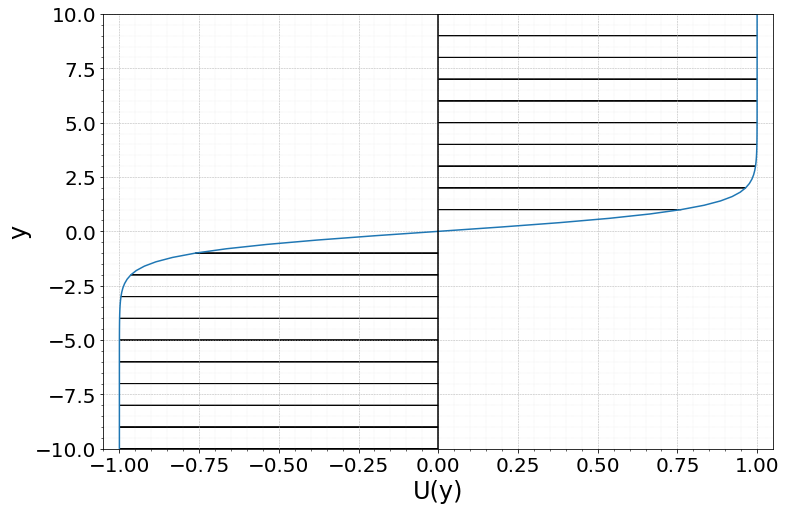

In [2]:
U_0 = 1.; H = 1.; y = np.linspace(-10, 10, 101); U = U_0 * np.tanh( y / H )
fig, ax = createPlot1( xlabel=r'U(y)', ylabel=r'y', title="")
plt.xlim([-1.05,1.05]); plt.ylim([-10.,10.]); plt.plot( U, y ); plt.plot([0.,0.],[-10,10],c='k')
for Y in range(-10, 11): ax.arrow(0, Y, tanh(Y/H), 0, head_width=0.00005, head_length=0.0005)
plt.savefig("/Users/daniellam/Google Drive/University/碩二/Special Topics of Hydrodynamics Stability /orrSommerBeamerInviscid/images/tanh.jpg")


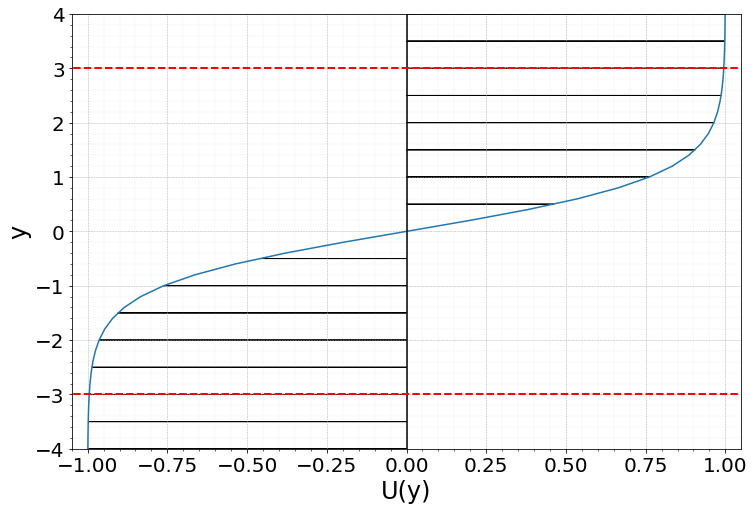

In [158]:
U_0 = 1.; H = 1.; y = np.linspace(-10, 10, 101); U = U_0 * np.tanh( y / H )
fig, ax = createPlot1( xlabel=r'U(y)', ylabel=r'y', title="")
plt.xlim([-1.05,1.05]); plt.ylim([-4.,4.]); plt.plot( U, y ); plt.plot([0.,0.],[-10,10],c='k')
for Y in range(-10, 11): ax.arrow(0, Y/2, tanh(Y/H/2), 0, head_width=0.00005, head_length=0.0005)
plt.plot([-3,3],[3,3],'--',lw=2,c='r')
plt.plot([-3,3],[-3,-3],'--',lw=2,c='r')
plt.savefig("/Users/daniellam/Google Drive/University/碩二/Special Topics of Hydrodynamics Stability /orrSommerBeamerInviscid/images/tanhTruncated.jpg")



The equation governing this equation is:

$$ \frac{ d^2 \phi }{ dy^2} - \left( \alpha^2 + \frac{1}{U-c}\frac{d^2U}{dy^2} \right)\phi = 0 $$

or better rewriten as

$$ \phi = \int \phi' dy $$
$$ \phi' = \int \phi'' dy = \int \left( \alpha^2 + \frac{1}{U-c}\frac{d^2U}{dy^2} \right)\phi dy $$



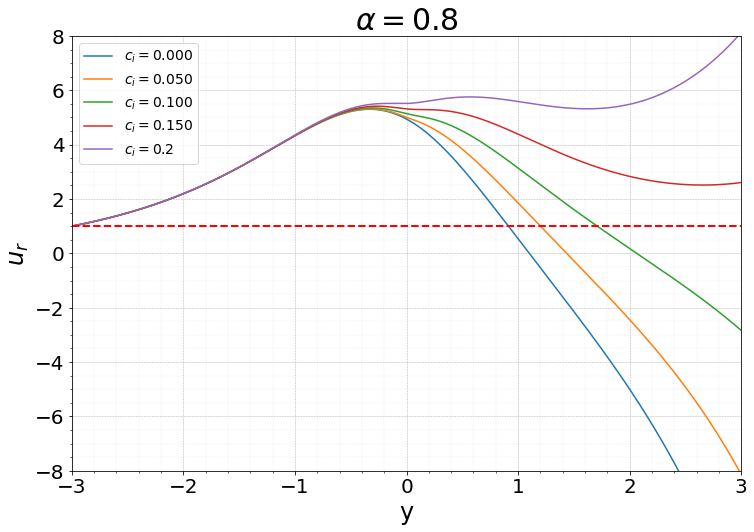

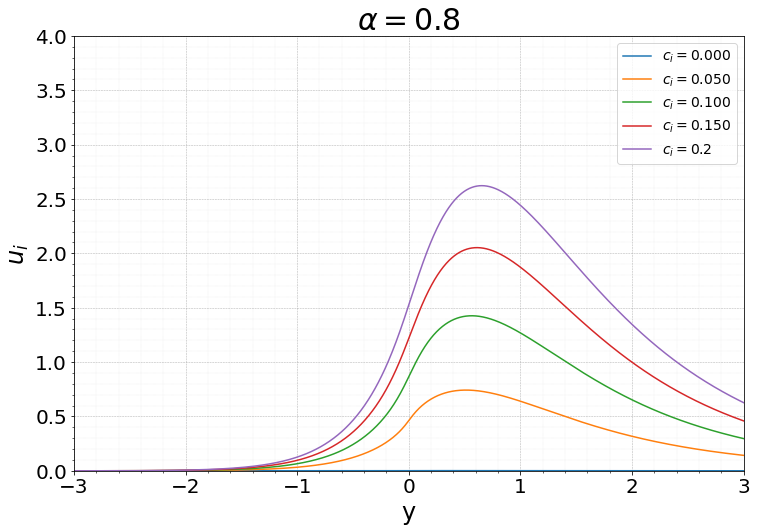

In [4]:
A = np.zeros([2, 2], dtype= np.clongdouble)
A[0,1] = 1.

def rhs(U0,U0pp,α,c,A,q):
    A[1,0]=α*α+U0pp/(U0-c)
    return np.matmul(A, q)


N = 1600 
α = .8; C = 0. + 1j*np.linspace(0.0001, 0.2, 5)
y = np.linspace(-3, 3, N); dy = y[1]-y[0]
U0 = U_0 * np.tanh(y/H);
U0p = U_0/H/(np.cosh(y/H)**2)
U0pp = -2*U_0/H/H*np.tanh(y/H)/(np.cosh(y/H)**2)


q = np.zeros([2,N],dtype=np.clongdouble)
fig, ax = createPlot1( xlabel=r'y', ylabel=r'$u_r$', title=r"$\alpha=0.8$")
for c in C:
    q[0,0] = 1.; q[1,0] = α
    for jj in range(N-1):
        q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
        q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
        q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
        q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
        q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    plt.plot(y, np.real(q[0,:]), label=r"$c_i=$"+str(np.imag(c))[:5])
plt.legend(fontsize=14)
plt.xlim([-3,3]); plt.ylim([-8.,8.]); plt.plot([-3,3],[1,1],'--',lw=2,c='r')
plt.savefig("/Users/daniellam/Google Drive/University/碩二/Special Topics of Hydrodynamics Stability /orrSommerBeamerInviscid/images/alpha08ur.jpg")



q = np.zeros([2,N],dtype=np.clongdouble)
fig, ax = createPlot1( xlabel=r'y', ylabel=r'$u_i$', title=r"$\alpha=0.8$")
for c in C:
    q[0,0] = 1.; q[1,0] = α
    for jj in range(N-1):
        q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
        q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
        q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
        q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
        q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    plt.plot(y, np.imag(q[0,:]), label=r"$c_i=$"+str(np.imag(c))[:5])
plt.legend(fontsize=14)
plt.xlim([-3,3]); plt.ylim([0.,4.]); 
plt.savefig("/Users/daniellam/Google Drive/University/碩二/Special Topics of Hydrodynamics Stability /orrSommerBeamerInviscid/images/alpha08ui.jpg")




/Users/daniellam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in longdouble_scalars
/Users/daniellam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in multiply


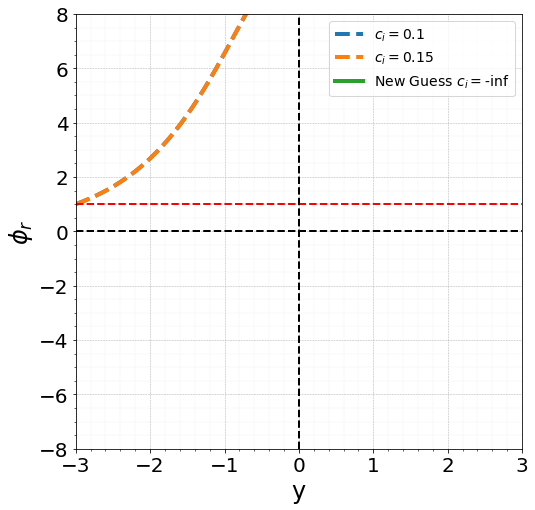

In [123]:
A = np.zeros([2, 2], dtype= np.clongdouble)
A[0,1] = 1.

def rhs(U0,U0pp,α,c,A,q):
    A[1,0]=α*α+U0pp/(U0-c)
    return np.matmul(A, q)


N = 800 
α = 1.; 
y = np.linspace(-3, 3, N); dy = y[1]-y[0]
U0 = U_0 * np.tanh(y/H);
U0p = U_0/H/(np.cosh(y/H)**2)
U0pp = -2*U_0/H/H*np.tanh(y/H)/(np.cosh(y/H)**2)
q = np.zeros([2,N],dtype=np.clongdouble)
fig, ax = createPlot1( xlabel=r'y', ylabel=r'$\phi_{r}$', title="")
q[0,0] = 1.; q[1,0] = α; c = 0. + 1j*-.05
for jj in range(N-1):
    q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
    q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
    q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
    q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
    q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"$c_i=0.1$")
qL1 = np.real(q[0,-1])
c = 0. + 1j*.05
for jj in range(N-1):
    q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
    q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
    q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
    q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
    q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"$c_i=0.15$")
qL2 = np.real(q[0,-1])

m = (.15-.1)/(qL2-qL1)
c = 0. + 1j*(.15+m*(1-qL2))
for jj in range(N-1):
    q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
    q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
    q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
    q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
    q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
plt.plot(y, np.real(q[0,:]), lw=4, label=r"New Guess $c_i=$" + str((.15+m*(1-qL2)))[:5] )

plt.legend(fontsize=14); plt.plot([-3,3],[1,1],'--',lw=2,c='r')
plt.xlim([-3,3]); plt.ylim([-8.,8.]); 
plt.plot([0,0],[-8,8],'--', lw=2,c='k'); plt.plot([-3,3],[0,0],'--', lw=2,c='k')
plt.show()



1.1020468381510934747j
0.5167237769194886535j
0.06362130939846089485j
-0.2865531685769447701j
-0.56736969016359259816j
-0.8049157035963950637j
-1.0167349209219229895j
-1.2138227882353165959j
-1.4027932785716166825j
-1.5875086340301126156j
-1.7701635647922733124j


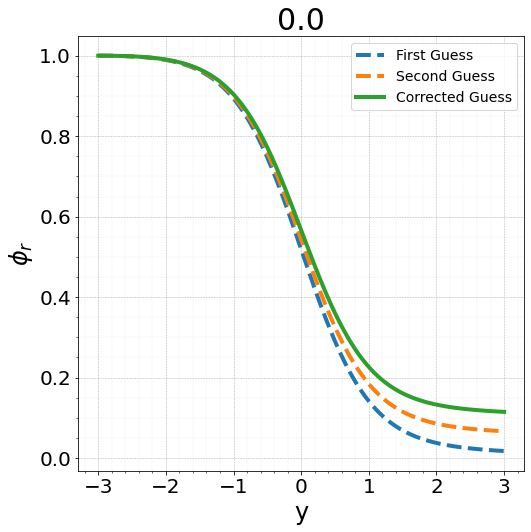

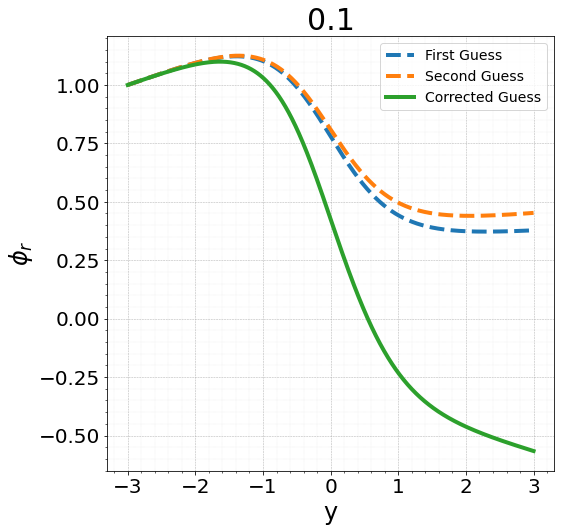

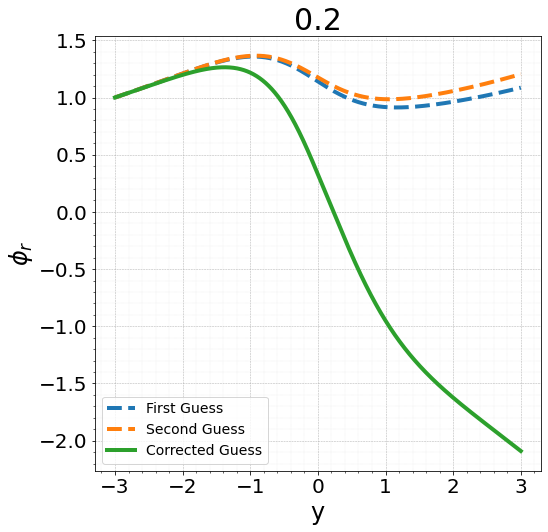

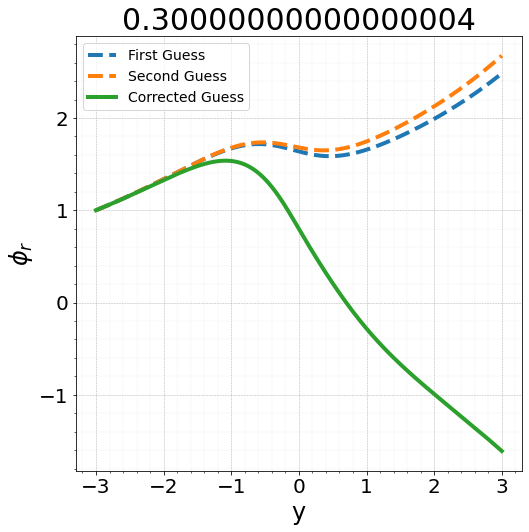

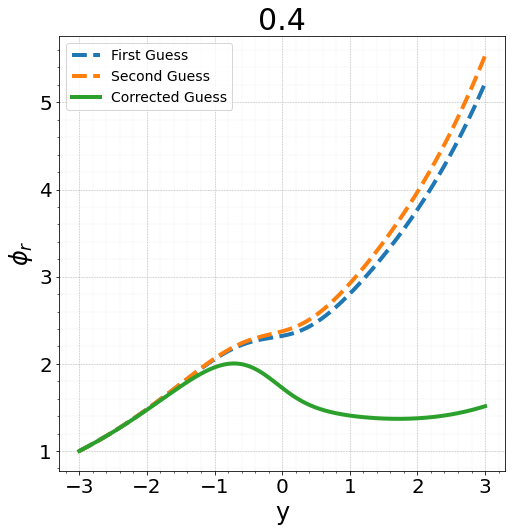

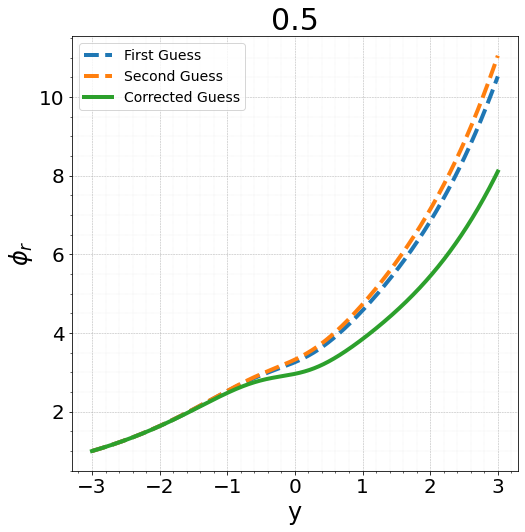

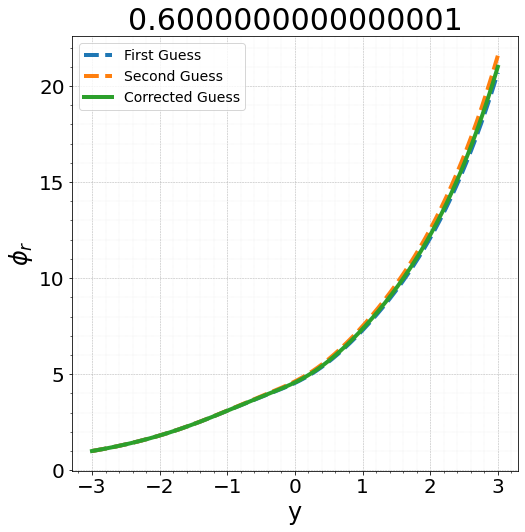

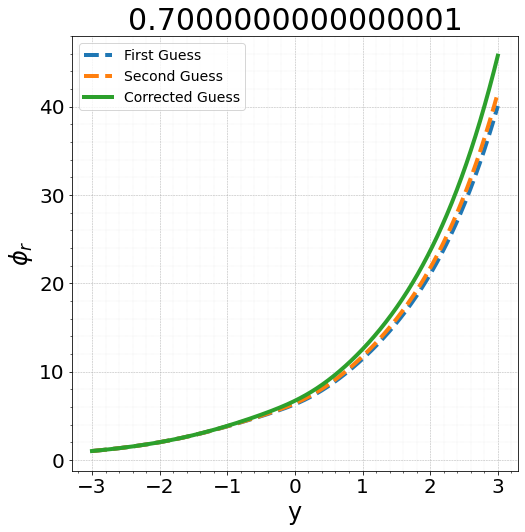

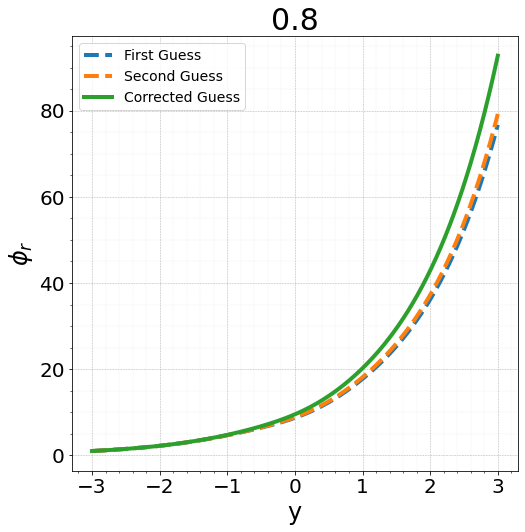

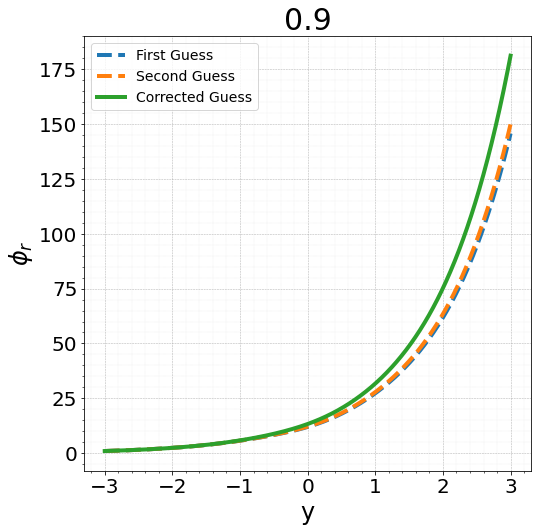

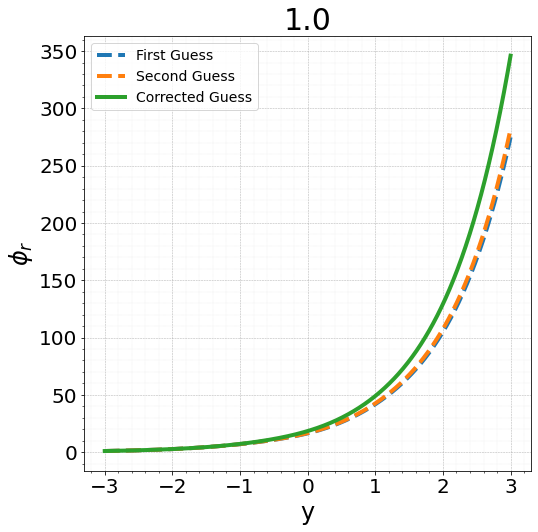

In [19]:
A = np.zeros([2, 2], dtype= np.clongdouble)
A[0,1] = 1.
N = 1600; M = 11

def runRungeKutta4(q):
    for jj in range(N-1):
        q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
        q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
        q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
        q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
        q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    return q
    

y = np.linspace(-3, 3, N); dy = y[1]-y[0]
U0 = U_0 * np.tanh(y/H);
U0p = U_0/H/(np.cosh(y/H)**2)
U0pp = -2*U_0/H/H*np.tanh(y/H)/(np.cosh(y/H)**2)
q = np.zeros([2,N],dtype=np.clongdouble)
c_i = np.zeros(M)
for idx, α in enumerate(np.linspace(0., 1., M)):
    fig, ax = createPlot1( xlabel=r'y', ylabel=r'$\phi_{r}$', title=str(α))
    q[0,0] = 1.; q[1,0] = α; 
    
    c = 0. + 1j*1
    q = runRungeKutta4(q)
    qL1 = np.real(q[0,-1])
    plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"First Guess")
    
    c = 0. + 1j*1.05
    q = runRungeKutta4(q)
    qL2 = np.real(q[0,-1])
    plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"Second Guess")
    
    m = (.15-.1)/(qL2-qL1)
    c = 0. + 1j*(.15+m*(1.-qL2))
    
    print(c )
    q = runRungeKutta4(q)
    plt.plot(y, np.real(q[0,:]), lw=4, label=r"Corrected Guess")
    plt.legend(fontsize=14)
    

        




In [ ]:
nr = 5
ni = 81
N = 51
Cr = np.linspace(-0.0000001+0.00,0.000001+0.00,nr)
Ci = np.linspace(0.0,.18,ni)
F = np.zeros((ni,nr),dtype=np.clongdouble)

y = np.linspace(-3, 3, N); dy = y[1]-y[0]
U0 = U_0 * np.tanh(y/H);
U0p = U_0/H/(np.cosh(y/H)**2)
U0pp = -2*U_0/H/H*np.tanh(y/H)/(np.cosh(y/H)**2)
q = np.zeros([2,N],dtype=np.clongdouble)
for i, cr in enumerate(Cr):
    for j, ci in enumerate(Ci):
        q[0,0] = 1.; q[1,0] = α
        c = cr - 1j*ci
        for jj in range(N-1):
            q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
            q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
            q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
            q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
            q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
        F[j,i] = q[1,-1]/(α*q[0,-1])
        
xx, yy = np.meshgrid(Cr, Ci)
fig, ax = createPlot1( xlabel=r'U(y)', ylabel=r'y', title="")
plt.contour(np.real(F), np.imag(F), xx)
plt.contour(np.real(F), np.imag(F), yy)
nr = 81
ni = 5
N = 51
Cr = np.linspace(-0.05,0.05,nr)
Ci = np.linspace(0.133333,.13333333333,ni)
F = np.zeros((ni,nr),dtype=np.clongdouble)

y = np.linspace(-3, 3, N); dy = y[1]-y[0]
U0 = U_0 * np.tanh(y/H);
U0p = U_0/H/(np.cosh(y/H)**2)
U0pp = -2*U_0/H/H*np.tanh(y/H)/(np.cosh(y/H)**2)
q = np.zeros([2,N],dtype=np.clongdouble)
for i, cr in enumerate(Cr):
    for j, ci in enumerate(Ci):
        q[0,0] = 1.; q[1,0] = α
        c = cr - 1j*ci
        for jj in range(N-1):
            q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
            q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
            q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
            q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
            q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
        F[j,i] = q[1,-1]/(α*q[0,-1])
        
xx, yy = np.meshgrid(Cr, Ci)
fig, ax = createPlot1( xlabel=r'U(y)', ylabel=r'y', title="")
plt.contour(np.real(F), np.imag(F), xx)
plt.contour(np.real(F), np.imag(F), yy)


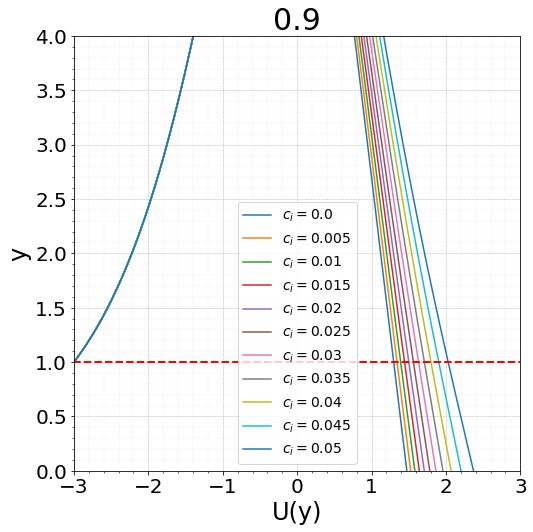

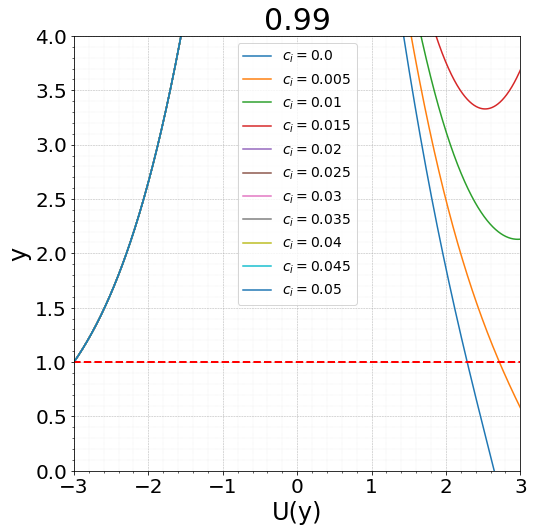

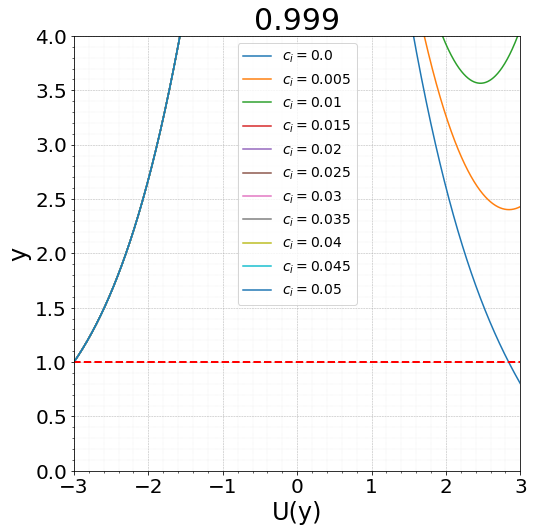

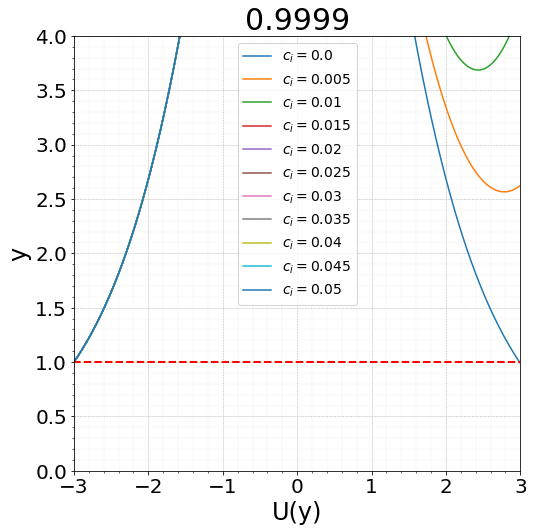

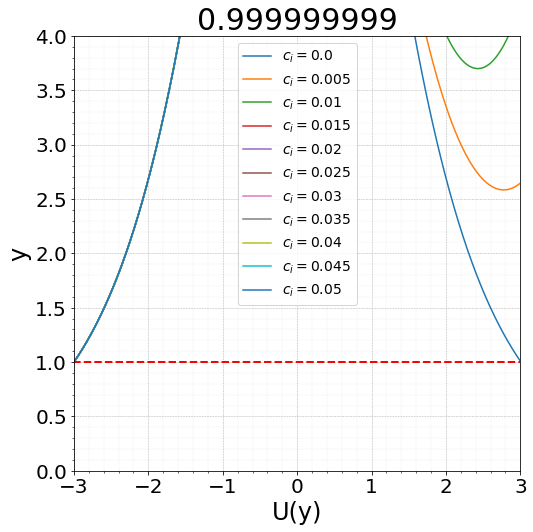

In [125]:
A = np.zeros([2, 2], dtype= np.clongdouble)
A[0,1] = 1.

def rhs(U0,U0pp,α,c,A,q):
    A[1,0]=α*α+U0pp/(U0-c)
    if np.abs(U0pp/(U0-c)) > 3:
        print(U0pp/(U0-c))
    return np.matmul(A, q)


N = 1600
α = 0.999; C = 0. + 1j*np.linspace(0.0, 0.05, 11)
y = np.linspace(-3, 3, N); dy = y[1]-y[0]
U0 = U_0 * np.tanh(y/H);
U0p = U_0/H/(np.cosh(y/H)**2)
U0pp = -2*U_0/H/H*np.tanh(y/H)/(np.cosh(y/H)**2)



q = np.zeros([2,N],dtype=np.clongdouble)
αα = [0.9, 0.99, 0.999, 0.9999, 0.999999999]
for α in αα:

    fig, ax = createPlot1( xlabel=r'U(y)', ylabel=r'y', title=str(α))
    for c in C:
        q[0,0] = 1; q[1,0] = α
        for jj in range(N-1):
            q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
            q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
            q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
            q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
            q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
        plt.plot(y, np.real(q[0,:]), label=r"$c_i=$"+str(np.imag(c)))
    plt.legend(fontsize=14)
    plt.xlim([-3,3]); plt.ylim([0,4]); plt.plot([-100,100],[1,1],'--',lw=2,c='r')
    plt.show()




0.836
0.8361
0.8361999999999999
0.8362999999999999
0.8363999999999999
0.8365
0.8366
0.8367
0.8368
0.8369
0.837


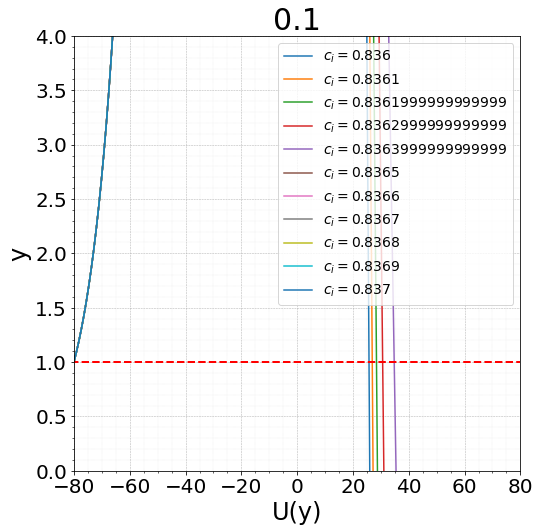

In [142]:
A = np.zeros([2, 2], dtype= np.clongdouble)
A[0,1] = 1.

def rhs(U0,U0pp,α,c,A,q):
    A[1,0]=α*α+U0pp/(U0-c)
    if np.abs(U0pp/(U0-c)) > 3:
        print(U0pp/(U0-c))
    return np.matmul(A, q)


N = 1600*8
α = 0.1; C = 0. + 1j*np.linspace(0.836, 0.837, 11)
L = 80
y = np.linspace(-L, L, N); dy = y[1]-y[0]
U0 = U_0 * np.tanh(y/H);U0p = U_0/H/(np.cosh(y/H)**2);U0pp = -2*U_0/H/H*np.tanh(y/H)/(np.cosh(y/H)**2)

q = np.zeros([2,N],dtype=np.clongdouble)
fig, ax = createPlot1( xlabel=r'U(y)', ylabel=r'y', title=str(α))
for c in C:
    q[0,0] = 1; q[1,0] = α
    for jj in range(N-1):
        q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj]); q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 );q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
        q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 );q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    plt.plot(y, np.real(q[0,:]), label=r"$c_i=$"+str(np.imag(c)))
    print(str(np.imag(c)))
plt.legend(fontsize=14);plt.xlim([-L,L]); plt.ylim([0,4]); plt.plot([-100,100],[1,1],'--',lw=2,c='r');plt.show()


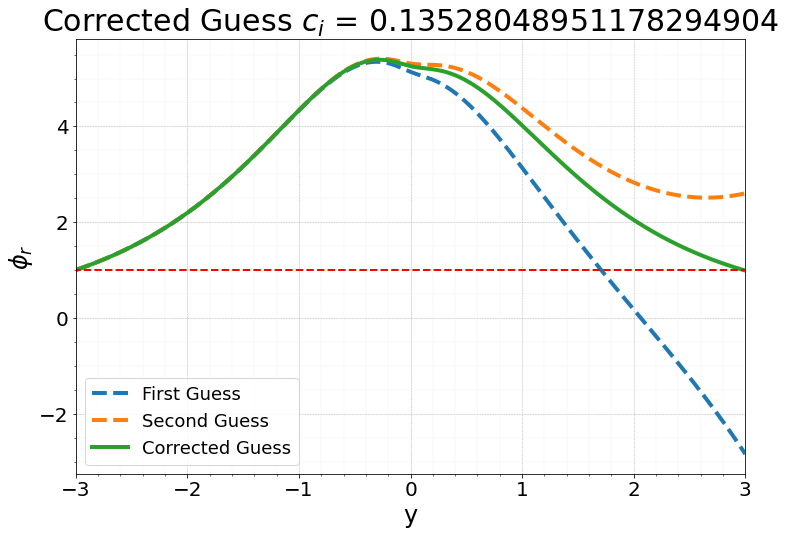

In [5]:
A = np.zeros([2, 2], dtype= np.clongdouble)
A[0,1] = 1.
N = 1600

def runRungeKutta4(q):
    for jj in range(N-1):
        q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
        q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
        q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
        q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
        q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    return q
    
L = 3; α = .8
y = np.linspace(-L, L, N); dy = y[1]-y[0]
U0 = U_0 * np.tanh(y/H);
U0p = U_0/H/(np.cosh(y/H)**2)
U0pp = -2*U_0/H/H*np.tanh(y/H)/(np.cosh(y/H)**2)
q = np.zeros([2,N],dtype=np.clongdouble)


fig, ax = createPlot1( xlabel=r'y', ylabel=r'$\phi_{r}$', title=str(α))


## initial conditions
q[0,0] = 1.; q[1,0] = α; 
## first two guesses
γ1 = 0.1
c = 0. + 1j*γ1
q = runRungeKutta4(q); qL1 = np.real(q[0,-1])
plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"First Guess")

γ2 = 0.15
c = 0. + 1j*γ2
q = runRungeKutta4(q); qL2 = np.real(q[0,-1])
plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"Second Guess")

m = (γ2-γ1)/(qL2-qL1)
c = 0. + 1j*(γ2+m*(1.-qL2))
q = runRungeKutta4(q)
plt.plot(y, np.real(q[0,:]), lw=4, label=r"Corrected Guess")
plt.xlim([-L,L])
plt.legend(fontsize=18);plt.plot([-100,100],[1,1],'--',lw=2,c='r');plt.title(r"Corrected Guess $c_i$ = " + str(np.imag(c))[:], fontsize=30)#;plt.show()
plt.savefig("/Users/daniellam/Google Drive/University/碩二/Special Topics of Hydrodynamics Stability /orrSommerBeamerInviscid/images/correctGuess.jpg")


        





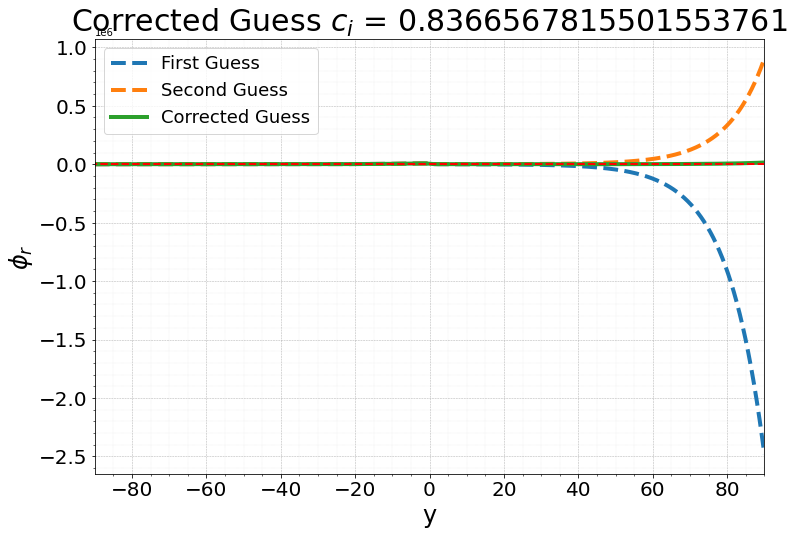

In [8]:
A = np.zeros([2, 2], dtype= np.clongdouble)
A[0,1] = 1.
N = 1600*15*2*2

def runRungeKutta4(q):
    for jj in range(N-1):
        q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
        q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
        q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
        q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
        q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    return q
    
L = 3*15*2; α = .1
y = np.linspace(-L, L, N); dy = y[1]-y[0]
U0 = U_0 * np.tanh(y/H);
U0p = U_0/H/(np.cosh(y/H)**2)
U0pp = -2*U_0/H/H*np.tanh(y/H)/(np.cosh(y/H)**2)
q = np.zeros([2,N],dtype=np.clongdouble)


fig, ax = createPlot1( xlabel=r'y', ylabel=r'$\phi_{r}$', title=str(α))


## initial conditions
q[0,0] = 1.; q[1,0] = α; 
## first two guesses
γ1 = 0.8
c = 0. + 1j*γ1
q = runRungeKutta4(q); qL1 = np.real(q[0,-1])
plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"First Guess")

γ2 = 0.85
c = 0. + 1j*γ2
q = runRungeKutta4(q); qL2 = np.real(q[0,-1])
plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"Second Guess")

m = (γ2-γ1)/(qL2-qL1)
c = 0. + 1j*(γ2+m*(1.-qL2))
q = runRungeKutta4(q)
plt.plot(y, np.real(q[0,:]), lw=4, label=r"Corrected Guess")
plt.xlim([-L,L])
plt.legend(fontsize=18);plt.plot([-100,100],[1,1],'--',lw=2,c='r');plt.title(r"Corrected Guess $c_i$ = " + str(np.imag(c))[:], fontsize=30)#;plt.show()
plt.savefig("/Users/daniellam/Google Drive/University/碩二/Special Topics of Hydrodynamics Stability /orrSommerBeamerInviscid/images/correctGuess3.jpg")


        






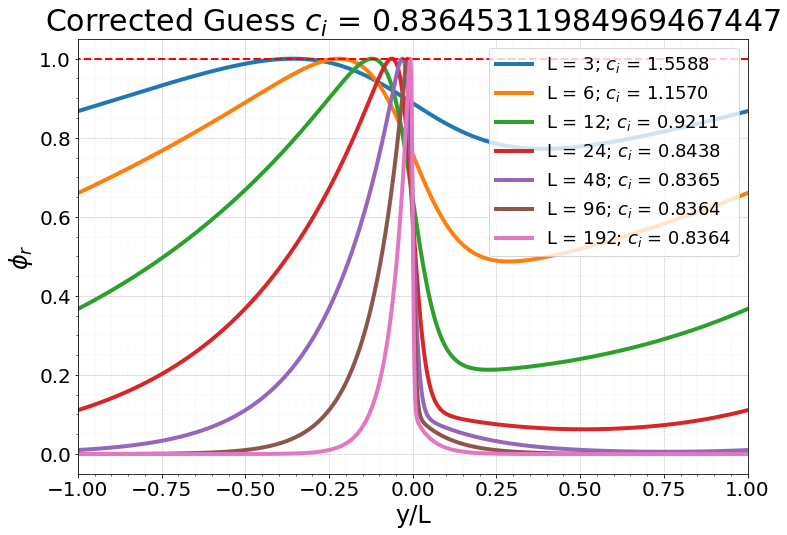

In [27]:
A = np.zeros([2, 2], dtype= np.clongdouble)
A[0,1] = 1.
# N = 1600*15*2*2

def runRungeKutta4(q):
    for jj in range(N-1):
        q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
        q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
        q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
        q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
        q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    return q
    

    
    
fig, ax = createPlot1( xlabel=r'y/L', ylabel=r'$\phi_{r}$', title=str(α))
for idx, L in enumerate([3, 6, 12, 24, 48, 96, 192]):
    N = 800 * 2**idx
    α = .1
    y = np.linspace(-L, L, N); dy = y[1]-y[0]
    U0 = U_0 * np.tanh(y/H);
    U0p = U_0/H/(np.cosh(y/H)**2)
    U0pp = -2*U_0/H/H*np.tanh(y/H)/(np.cosh(y/H)**2)
    q = np.zeros([2,N],dtype=np.clongdouble)


    ## initial conditions
    q[0,0] = 1.; q[1,0] = α; 
    ## first two guesses
    γ1 = 0.8
    c = 0. + 1j*γ1
    q = runRungeKutta4(q); qL1 = np.real(q[0,-1])
#     plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"First Guess")

    γ2 = 0.85
    c = 0. + 1j*γ2
    q = runRungeKutta4(q); qL2 = np.real(q[0,-1])
#     plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"Second Guess")

#     m = (γ2-γ1)/(qL2-qL1)
#     c = 0. + 1j*(γ2+m*(1.-qL2))
#     q = runRungeKutta4(q)
#     plt.plot(y/L, np.real(q[0,:])/np.real(np.max(q[0,:])), lw=4, label=r"L = " + str(L))
    
    for kk in range( 8 ):
        m = (γ2-γ1)/(qL2-qL1)
        c = 0. + 1j*(γ2+m*(1.-qL2))
        q = runRungeKutta4(q)
        γ1 = γ2; γ2 = np.imag( c )
        qL1 = qL2; qL2 = np.real(q[0,-1])
        
    plt.plot(y/L, np.real(q[0,:])/np.real(np.max(q[0,:])), lw=4, label=r"L = " + str(L) + "; $c_i$ = " + str(np.imag(c))[:6])
plt.xlim([-1.,1.])
plt.legend(fontsize=18);plt.plot([-100,100],[1,1],'--',lw=2,c='r');plt.title(r"Corrected Guess $c_i$ = " + str(np.imag(c))[:], fontsize=30)#;plt.show()
plt.savefig("/Users/daniellam/Google Drive/University/碩二/Special Topics of Hydrodynamics Stability /orrSommerBeamerInviscid/images/truncationLengthEffect.jpg")


        







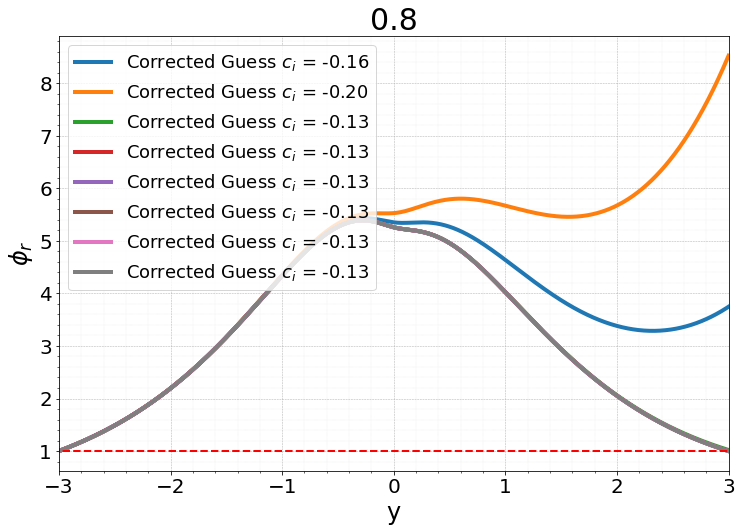

In [18]:
A = np.zeros([2, 2], dtype= np.clongdouble)
A[0,1] = 1.
N = 1600#*15*2*2

def runRungeKutta4(q):
    for jj in range(N-1):
        q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
        q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
        q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
        q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
        q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    return q
    
L = 3*1; α = .8
y = np.linspace(-L, L, N); dy = y[1]-y[0]
U0 = U_0 * np.tanh(y/H);
U0p = U_0/H/(np.cosh(y/H)**2)
U0pp = -2*U_0/H/H*np.tanh(y/H)/(np.cosh(y/H)**2)
q = np.zeros([2,N],dtype=np.clongdouble)


fig, ax = createPlot1( xlabel=r'y', ylabel=r'$\phi_{r}$', title=str(α))


## initial conditions
q[0,0] = 1.; q[1,0] = α; 
## first two guesses
γ1 = 0.8
c = 0. + 1j*γ1
q = runRungeKutta4(q); qL1 = np.real(q[0,-1])
# plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"First Guess")

γ2 = 0.85
c = 0. + 1j*γ2
q = runRungeKutta4(q); qL2 = np.real(q[0,-1])
# plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"Second Guess")

for kk in range( 8 ):
    m = (γ2-γ1)/(qL2-qL1)
    c = 0. + 1j*(γ2+m*(1.-qL2))
    q = runRungeKutta4(q)
    plt.plot(y, np.real(q[0,:]), lw=4, label=r"Corrected Guess $c_i$ = " + str(np.imag(c))[:5] )
    γ1 = γ2; γ2 = np.imag( c )
    qL1 = qL2; qL2 = np.real(q[0,-1])
    

plt.xlim([-L,L])
plt.legend(fontsize=18);plt.plot([-100,100],[1,1],'--',lw=2,c='r');#plt.title(r"Corrected Guess $c_i$ = " + str(np.imag(c))[:], fontsize=30)#;plt.show()
plt.savefig("/Users/daniellam/Google Drive/University/碩二/Special Topics of Hydrodynamics Stability /orrSommerBeamerInviscid/images/correctGuess3.jpg")


        







In [31]:
A = np.zeros([2, 2], dtype= np.clongdouble)
A[0,1] = 1.

def runRungeKutta4(q):
    for jj in range(N-1):
        q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
        q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
        q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
        q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
        q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    return q
    
L = 3*1; α = .8
y = np.linspace(-L, L, N); dy = y[1]-y[0]
U0 = U_0 * np.tanh(y/H);
U0p = U_0/H/(np.cosh(y/H)**2)
U0pp = -2*U_0/H/H*np.tanh(y/H)/(np.cosh(y/H)**2)
q = np.zeros([2,N],dtype=np.clongdouble)

M = 10
cii = np.zeros(M)
for idx, α in enumerate(np.linspace(0.1, 1., M)): 
    L = 96*(0.1/α);
    N = int(800*16*(0.1/α)); print(L,N)
    if N % 2 == 1:
        N = N + 1
    
    y = np.linspace(-L, L, N); dy = y[1]-y[0]
    U0 = U_0 * np.tanh(y/H);
    U0p = U_0/H/(np.cosh(y/H)**2)
    U0pp = -2*U_0/H/H*np.tanh(y/H)/(np.cosh(y/H)**2)
    q = np.zeros([2,N],dtype=np.clongdouble)





    ## initial conditions
    q[0,0] = 1.; q[1,0] = α; 
    ## first two guesses
    γ1 = 1. - α
    c = 0. + 1j*γ1+.025
    q = runRungeKutta4(q); qL1 = np.real(q[0,-1])
    # plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"First Guess")

    γ2 = 0. + 1j*γ1-.025
    c = 0. + 1j*γ2
    q = runRungeKutta4(q); qL2 = np.real(q[0,-1])
    # plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"Second Guess")

    for kk in range( 8 ):
        m = (γ2-γ1)/(qL2-qL1)
        c = 0. + 1j*(γ2+m*(1.-qL2))
        q = runRungeKutta4(q)
#         plt.plot(y, np.real(q[0,:]), lw=4, label=r"Corrected Guess $c_i$ = " + str(np.imag(c))[:5] )
        γ1 = γ2; γ2 = np.imag( c )
        qL1 = qL2; qL2 = np.real(q[0,-1])
        
    cii[idx] = np.imag(c)
    print(cii[idx])

# plt.xlim([-L,L])
# plt.legend(fontsize=18);plt.plot([-100,100],[1,1],'--',lw=2,c='r');#plt.title(r"Corrected Guess $c_i$ = " + str(np.imag(c))[:], fontsize=30)#;plt.show()
# plt.savefig("/Users/daniellam/Google Drive/University/碩二/Special Topics of Hydrodynamics Stability /orrSommerBeamerInviscid/images/correctGuess3.jpg")


        








96.0 12800
0.8364840582638987
48.0 6400
0.697476077345212
32.0 4266
0.5769071743809464
24.0 3200
0.47045883935575106
19.200000000000003 2560
0.37502713504808033
16.0 2133
0.2883273408251973
13.714285714285714 1828
0.20864436625139843
12.0 1600
0.13466862104117858
10.666666666666668 1422
0.06538513421968051
9.600000000000001 1280
-0.0002761293110255794


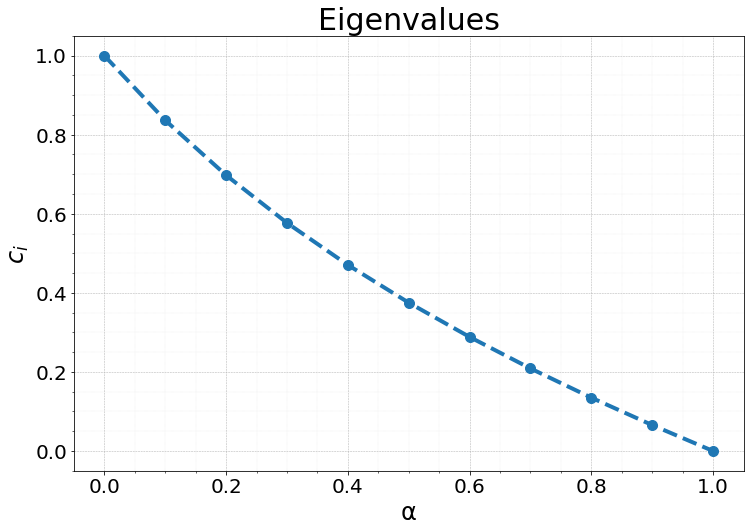

In [35]:
fig, ax = createPlot1( xlabel=r'α', ylabel=r'$c_i$', title="Eigenvalues")
cii2 = np.concatenate( ([1.], cii))
plt.plot(np.linspace(0., 1., M+1), cii2, '--o', ms=10, lw=4)
plt.savefig("/Users/daniellam/Google Drive/University/碩二/Special Topics of Hydrodynamics Stability /orrSommerBeamerInviscid/images/eigenvalues.jpg")




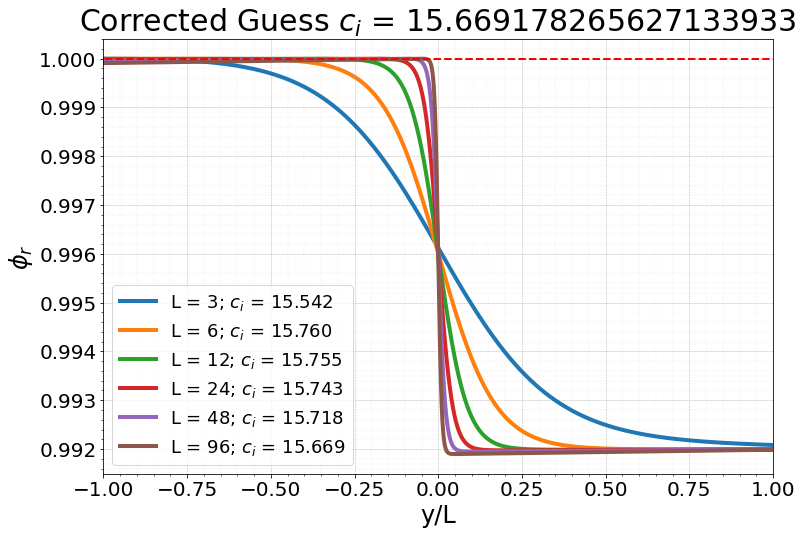

In [37]:
A = np.zeros([2, 2], dtype= np.clongdouble)
A[0,1] = 1.
# N = 1600*15*2*2

def runRungeKutta4(q):
    for jj in range(N-1):
        q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
        q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
        q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
        q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
        q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    return q
    

    
    
fig, ax = createPlot1( xlabel=r'y/L', ylabel=r'$\phi_{r}$', title=str(α))
for idx, L in enumerate([3, 6, 12, 24, 48, 96]):
    N = 800 * 2**idx
    α = .000001
    y = np.linspace(-L, L, N); dy = y[1]-y[0]
    U0 = U_0 * np.tanh(y/H);
    U0p = U_0/H/(np.cosh(y/H)**2)
    U0pp = -2*U_0/H/H*np.tanh(y/H)/(np.cosh(y/H)**2)
    q = np.zeros([2,N],dtype=np.clongdouble)


    ## initial conditions
    q[0,0] = 1.; q[1,0] = α; 
    ## first two guesses
    γ1 = 0.999
    c = 0. + 1j*γ1
    q = runRungeKutta4(q); qL1 = np.real(q[0,-1])
#     plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"First Guess")

    γ2 = 0.999999
    c = 0. + 1j*γ2
    q = runRungeKutta4(q); qL2 = np.real(q[0,-1])
#     plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"Second Guess")

#     m = (γ2-γ1)/(qL2-qL1)
#     c = 0. + 1j*(γ2+m*(1.-qL2))
#     q = runRungeKutta4(q)
#     plt.plot(y/L, np.real(q[0,:])/np.real(np.max(q[0,:])), lw=4, label=r"L = " + str(L))
    
    for kk in range( 8 ):
        m = (γ2-γ1)/(qL2-qL1)
        c = 0. + 1j*(γ2+m*(1.-qL2))
        q = runRungeKutta4(q)
        γ1 = γ2; γ2 = np.imag( c )
        qL1 = qL2; qL2 = np.real(q[0,-1])
        
    plt.plot(y/L, np.real(q[0,:])/np.real(np.max(q[0,:])), lw=4, label=r"L = " + str(L) + "; $c_i$ = " + str(np.imag(c))[:6])
plt.xlim([-1.,1.])
plt.legend(fontsize=18);plt.plot([-100,100],[1,1],'--',lw=2,c='r');plt.title(r"Corrected Guess $c_i$ = " + str(np.imag(c))[:], fontsize=30)#;plt.show()
plt.savefig("/Users/daniellam/Google Drive/University/碩二/Special Topics of Hydrodynamics Stability /orrSommerBeamerInviscid/images/truncationLengthEffect2.jpg")


        








/Users/daniellam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/Users/daniellam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in square


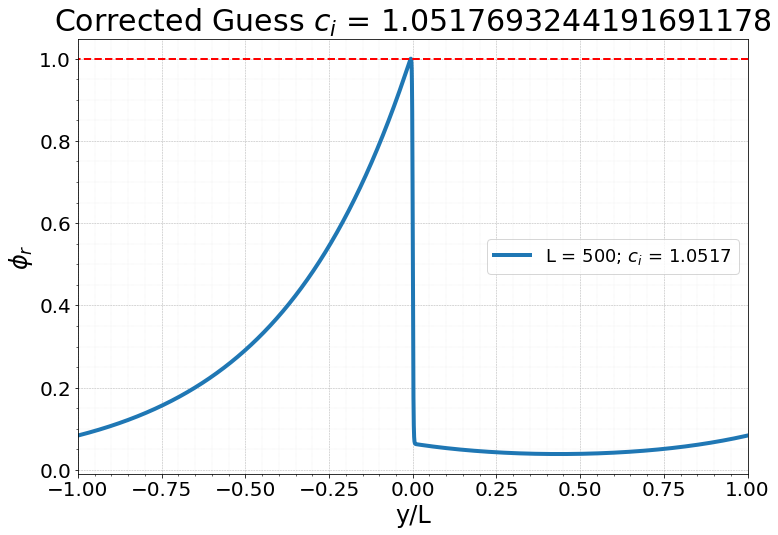

In [41]:
A = np.zeros([2, 2], dtype= np.clongdouble)
A[0,1] = 1.
# N = 1600*15*2*2

def runRungeKutta4(q):
    for jj in range(N-1):
        q1 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj])
        q2 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q1/2 )
        q3 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q2/2 )
        q4 = dy * rhs(U0[jj], U0pp[jj], α, c, A, q[:,jj] + q3 )
        q[:, jj+1] = q[:, jj] + (1/6) * ( q1 + 2*q2 + 2*q3 + q4 )
    return q
    

    
    
fig, ax = createPlot1( xlabel=r'y/L', ylabel=r'$\phi_{r}$', title=str(α))
for idx, L in enumerate([500]):
    N = 8000 * 2**idx
    α = .005
    y = np.linspace(-L, L, N); dy = y[1]-y[0]
    U0 = U_0 * np.tanh(y/H);
    U0p = U_0/H/(np.cosh(y/H)**2)
    U0pp = -2*U_0/H/H*np.tanh(y/H)/(np.cosh(y/H)**2)
    q = np.zeros([2,N],dtype=np.clongdouble)


    ## initial conditions
    q[0,0] = 1.; q[1,0] = α; 
    ## first two guesses
    γ1 = 0.999999999
    c = 0. + 1j*γ1
    q = runRungeKutta4(q); qL1 = np.real(q[0,-1])
#     plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"First Guess")

    γ2 = 0.9999999999999
    c = 0. + 1j*γ2
    q = runRungeKutta4(q); qL2 = np.real(q[0,-1])
#     plt.plot(y, np.real(q[0,:]), '--', lw=4, label=r"Second Guess")

#     m = (γ2-γ1)/(qL2-qL1)
#     c = 0. + 1j*(γ2+m*(1.-qL2))
#     q = runRungeKutta4(q)
#     plt.plot(y/L, np.real(q[0,:])/np.real(np.max(q[0,:])), lw=4, label=r"L = " + str(L))
    
    for kk in range( 8 ):
        m = (γ2-γ1)/(qL2-qL1)
        c = 0. + 1j*(γ2+m*(1.-qL2))
        q = runRungeKutta4(q)
        γ1 = γ2; γ2 = np.imag( c )
        qL1 = qL2; qL2 = np.real(q[0,-1])
        
    plt.plot(y/L, np.real(q[0,:])/np.real(np.max(q[0,:])), lw=4, label=r"L = " + str(L) + "; $c_i$ = " + str(np.imag(c))[:6])
plt.xlim([-1.,1.])
plt.legend(fontsize=18);plt.plot([-100,100],[1,1],'--',lw=2,c='r');plt.title(r"Corrected Guess $c_i$ = " + str(np.imag(c))[:], fontsize=30)#;plt.show()
plt.savefig("/Users/daniellam/Google Drive/University/碩二/Special Topics of Hydrodynamics Stability /orrSommerBeamerInviscid/images/truncationLengthEffect2.jpg")


        







